In [ ]:
#next steps? run models, grouping pitchers by the team they played for, and then getting team rankings.
#Or, look at changes in player rankings/scores from team to team, to see how well our pitching staff might be doing with helping pitchers develop deception.
#double down on standardizing so i can compare players better.
#scrape https://www.mlb.com/player/albert-abreu-656061 or another source to get photos for leaderboard.
#venture into predictabilty based on pitch type and pitch count. Just didn't get there on this project
#mess around wiht release point y and finger length, does that help?

# #website sources
# https://www.theringer.com/mlb/2021/9/28/22695180/yusmeiro-petit-deception-pitching-delivery-velocity-biomechanics-invisiball
# https://towardsdatascience.com/quantifying-pitcher-deception-7fb2288661c8
# https://blogs.fangraphs.com/an-attempt-to-quantify-pitcher-deception/
# https://www.batterypower.com/2023/4/26/23699430/atlanta-braves-player-analysis-bryce-elder-pitching-stuff-bamboozling-he-can-throw-a-baseball
# https://jon2anderson.medium.com/quantifying-pitcher-fastball-deception-760832ec14ab
# https://thinkbluepc.com/2021/09/04/a-closer-look-at-andrew-vasquez/
# https://mlb.com/news/cesar-valdez-s-dead-fish-changeup-analyzed

In [ ]:
!pip install pybaseball

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
import pandas as pd
import pybaseball
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.linear_model import LinearRegression






In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# #enable caching so we don't lose all progress if it gets disrupted
# pybaseball.cache.enable()
# #scrape data

# # raw19 = pybaseball.statcast(start_dt = '2019-01-01', end_dt = '2019-12-31')
# raw23 = pybaseball.statcast(start_dt = '2023-01-01', end_dt = '2023-11-02')

# # raw19.to_csv("/drive/My Drive/Colab Notebooks/raw19.csv", index=False)
# raw23.to_csv("/drive/My Drive/Colab Notebooks/raw23_new.csv", index=False)

In [ ]:
# raw19 = pd.read_csv('/drive/My Drive/Colab Notebooks/data/raw19.csv')
raw21 = pd.read_csv('/drive/My Drive/Colab Notebooks/data/raw21.csv')
raw20 = pd.read_csv('/drive/My Drive/Colab Notebooks/data/raw20.csv')
raw22 = pd.read_csv('/drive/My Drive/Colab Notebooks/data/raw22.csv')
raw23 = pd.read_csv('/drive/My Drive/raw23_new.csv')

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CU,2023-11-01,84.9,-1.19,6.12,"Sborz, Josh",606466,622250,strikeout,called_strike,...,5,5,0,0,5,Infield shade,Standard,26.0,0.000,-0.090
1,FF,2023-11-01,96.6,-0.69,6.24,"Sborz, Josh",606466,622250,NaN,ball,...,5,5,0,0,5,Strategic,Standard,206.0,0.000,0.016
2,CU,2023-11-01,84.5,-1.27,6.11,"Sborz, Josh",606466,622250,NaN,called_strike,...,5,5,0,0,5,Standard,Standard,24.0,0.000,-0.027
3,FF,2023-11-01,95.4,-0.80,6.23,"Sborz, Josh",606466,622250,NaN,foul,...,5,5,0,0,5,Standard,Standard,204.0,0.000,-0.022
4,FF,2023-11-01,95.6,-0.83,6.19,"Sborz, Josh",606466,622250,NaN,ball,...,5,5,0,0,5,Standard,Standard,207.0,0.000,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771052,NaN,2023-03-15,NaN,NaN,NaN,"Dunning, Dane",679845,641540,field_out,hit_into_play,...,0,0,0,0,0,NaN,NaN,NaN,0.030,NaN
771053,NaN,2023-03-15,NaN,NaN,NaN,"Dunning, Dane",668472,641540,strikeout,swinging_strike,...,0,0,0,0,0,NaN,NaN,NaN,0.041,NaN
771054,NaN,2023-03-15,NaN,NaN,NaN,"Dunning, Dane",668472,641540,NaN,called_strike,...,0,0,0,0,0,NaN,NaN,NaN,0.000,NaN
771055,NaN,2023-03-15,NaN,NaN,NaN,"Dunning, Dane",668472,641540,NaN,foul,...,0,0,0,0,0,NaN,NaN,NaN,0.000,NaN


In [ ]:
# #come back to this to clean up
# needed_columns = ['game_date', 'game_year', 'game_pk', 'player_name', 'pitcher', 'batter', 'pitch_type', 'pitch_name', 'stand', 'p_throws', 'balls', 'strikes', 'release_speed',
#                   'release_spin_rate', 'release_extension', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z',
#                   'plate_x', 'plate_z',  'type', 'events', 'description', 'woba_value', 'at_bat_number', 'pitch_number','pitcher_batter_number']


needed_columns2 = ['type','release_pos_x','release_pos_y','release_pos_z','game_pk','at_bat_number','game_date','events','pitch_type',
                   'balls','strikes','pitch_number','pitcher','player_name','batter','pfx_x','pfx_z','p_throws','description','game_year']

In [ ]:
all_data = pd.concat((raw23, raw22, raw21, raw20))
# all_data = all_data.sort_values(by='game_date', ascending=True)

#get leads xz coordinates from pitch to pitch within an at-bat
all_data = all_data[needed_columns2]

#get rid of pitch_type = null
all_data = all_data.dropna(subset=['pitch_type'])


#get rid of position players or guys who barely pitched
pitcher_counts = all_data.groupby('pitcher')['pitcher'].transform('count')
all_data = all_data[pitcher_counts >= 100]


all_data['release_pos_x_lead'] = all_data.groupby(['game_pk', 'at_bat_number'])['release_pos_x'].shift(-1)
all_data['release_pos_z_lead'] = all_data.groupby(['game_pk', 'at_bat_number'])['release_pos_z'].shift(-1)

#calculate the distance between release point from pitch to pitch
all_data['xz_distance'] = ((all_data['release_pos_x_lead'] - all_data['release_pos_x'])**2 +
                       (all_data['release_pos_z_lead'] - all_data['release_pos_z'])**2)**0.5

#same type of pitch as previous?
mask = (all_data['game_pk'] == all_data['game_pk'].shift(-1)) & (all_data['at_bat_number'] == all_data['at_bat_number'].shift(-1))
all_data['same_pitch?'] = (all_data['pitch_type'] == all_data['pitch_type'].shift(-1)).astype(int).where(mask, None)

# could filter out when xz_distance > .75
all_data

,type,release_pos_x,release_pos_y,release_pos_z,game_pk,at_bat_number,game_date,events,pitch_type,balls,...,batter,pfx_x,pfx_z,p_throws,description,game_year,release_pos_x_lead,release_pos_z_lead,xz_distance,same_pitch?
0,S,-1.19,54.73,6.12,748534,77,2023-11-01,strikeout,CU,2,...,606466,1.14,-0.90,R,called_strike,2023,-0.69,6.24,0.514198,0.0
1,B,-0.69,54.44,6.24,748534,77,2023-11-01,NaN,FF,1,...,606466,-0.35,1.45,R,ball,2023,-1.27,6.11,0.594390,0.0
2,S,-1.27,54.72,6.11,748534,77,2023-11-01,NaN,CU,1,...,606466,1.06,-0.87,R,called_strike,2023,-0.80,6.23,0.485077,0.0
3,S,-0.80,54.39,6.23,748534,77,2023-11-01,NaN,FF,1,...,606466,-0.63,1.56,R,foul,2023,-0.83,6.19,0.050000,1.0
4,B,-0.83,54.45,6.19,748534,77,2023-11-01,NaN,FF,0,...,606466,-0.14,1.67,R,ball,2023,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279655,X,-3.28,54.09,5.13,630851,1,2020-07-23,field_out,FF,2,...,543305,-0.75,1.25,R,hit_into_play,2020,-3.36,5.48,0.359026,0.0
279656,S,-3.36,54.28,5.48,630851,1,2020-07-23,NaN,CU,2,...,543305,0.95,-0.82,R,called_strike,2020,-3.21,5.33,0.212132,0.0
279657,S,-3.21,54.29,5.33,630851,1,2020-07-23,NaN,FF,2,...,543305,-0.78,1.27,R,called_strike,2020,-3.38,5.33,0.170000,1.0
279658,B,-3.38,54.38,5.33,630851,1,2020-07-23,NaN,FF,1,...,543305,-0.79,1.44,R,ball,2020,-3.28,5.47,0.172047,1.0


In [ ]:
# I am looking for high constincy (low variance) for consecuitve pitchers where same_pitch? = 0 (meaning they are't throwing from different locations for different pitches, which batters could pick up on).
var_diff_pitches_by_pitcher2 = all_data[all_data['same_pitch?'] == 0].groupby('pitcher')['xz_distance'].var().reset_index()
var_diff_pitches_by_pitcher2.rename(columns={'pitcher': 'pitcher', 'xz_distance': 'consec_pitch_dist_variance'}, inplace=True)

#set an innnings requirement so that we don't have position players

var_diff_pitches_by_pitcher2.loc[var_diff_pitches_by_pitcher2['consec_pitch_dist_variance'].idxmax()]


# If it's the same pitch, I will either ignore it or look for inconsistency (higher variance) which means they can throw the same pitch from different locations.

pitcher                       594985.00000
consec_pitch_dist_variance         1.43933
Name: 312, dtype: float64

In [ ]:
len(all_data['pitcher'].unique())

1208

In [ ]:
#getting variances for each pitch type by pitcher, weighted by amount of that pitch thrown. We want to see low varian

# Calculate the variance of 'xz_distance' for each pitcher and pitch_type
pitcher_pitch_type_variances = all_data.groupby(['pitcher', 'pitch_type'])['xz_distance'].var().unstack(fill_value=0)
pitcher_pitch_type_variances = pitcher_pitch_type_variances.replace(0, float('nan'))
pitcher_pitch_type_variances
# all_data.groupby(['pitcher', 'pitch_type'])['xz_distance'].var().unstack(fill_value=0)





pitch_type,CH,CS,CU,EP,FA,FC,FF,FO,FS,KC,KN,PO,SC,SI,SL,ST,SV
pitcher,,,,,,,,,,,,,,,,,
424144,NaN,NaN,NaN,NaN,NaN,NaN,0.091191,NaN,NaN,NaN,NaN,NaN,NaN,0.070507,0.070538,NaN,NaN
425794,0.010986,0.006615,0.015521,NaN,NaN,0.014812,0.017473,NaN,NaN,NaN,NaN,NaN,NaN,0.017147,0.232940,NaN,NaN
425844,0.016991,0.043121,0.022540,0.00684,0.024901,0.017072,0.021713,NaN,NaN,NaN,NaN,NaN,NaN,0.014285,0.020068,NaN,NaN
429722,0.010266,NaN,NaN,NaN,NaN,NaN,0.006537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012782,NaN,NaN
431148,0.006514,NaN,NaN,NaN,NaN,NaN,0.006611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021065,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695243,0.010448,NaN,NaN,NaN,NaN,0.006889,0.006558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007098,NaN,NaN
696136,0.013517,NaN,0.030687,NaN,NaN,0.027265,0.022843,NaN,NaN,NaN,NaN,NaN,NaN,0.029214,0.014674,NaN,NaN
696147,0.011471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006760,0.007467,NaN,NaN


In [ ]:
all_data[pd.isna(all_data['pitch_type'])]


,type,release_pos_x,release_pos_y,release_pos_z,game_pk,at_bat_number,game_date,events,pitch_type,balls,...,batter,pfx_x,pfx_z,p_throws,description,game_year,release_pos_x_lead,release_pos_z_lead,xz_distance,same_pitch?


In [ ]:
all_data['pitch_type'].unique()


array(['CU', 'FF', 'ST', 'SL', 'SI', 'KC', 'CH', 'FC', 'FS', 'PO', 'SV',
       'KN', 'FO', 'CS', 'FA', 'SC', 'EP'], dtype=object)

In [ ]:
# trying to get this same df ^^ for pitch didstribution so i can multiply
# Calculate the proportion of each 'pitch_type' for each pitcher for all pitches thrown by that pitcher
pitcher_pitch_type_proportions = all_data.groupby(['pitcher', 'pitch_type']).size() / all_data.groupby('pitcher').size()

# Pivot the proportions to match the same groupings and dimensions as pitcher_pitch_type_variances
pitcher_pitch_type_proportions = pitcher_pitch_type_proportions.unstack(fill_value=0)

pitcher_pitch_type_proportions.columns

Index(['CH', 'CS', 'CU', 'EP', 'FA', 'FC', 'FF', 'FO', 'FS', 'KC', 'KN', 'PO',
       'SC', 'SI', 'SL', 'ST', 'SV'],
      dtype='object', name='pitch_type')

In [ ]:
weighted_vars = pitcher_pitch_type_variances * pitcher_pitch_type_proportions
var_dist_all_pitches_df = pd.DataFrame({'pitcher': weighted_vars.index, 'var_dist_all_pitches': weighted_vars.sum(axis=1)})
var_dist_all_pitches_df
#the lower, the better. it means they throw from the same spot for different pitches.



,pitcher,var_dist_all_pitches
pitcher,,
424144,424144,0.073318
425794,425794,0.015931
425844,425844,0.019999
429722,429722,0.009885
431148,431148,0.008676
...,...,...
695243,695243,0.006930
696136,696136,0.022084
696147,696147,0.007260


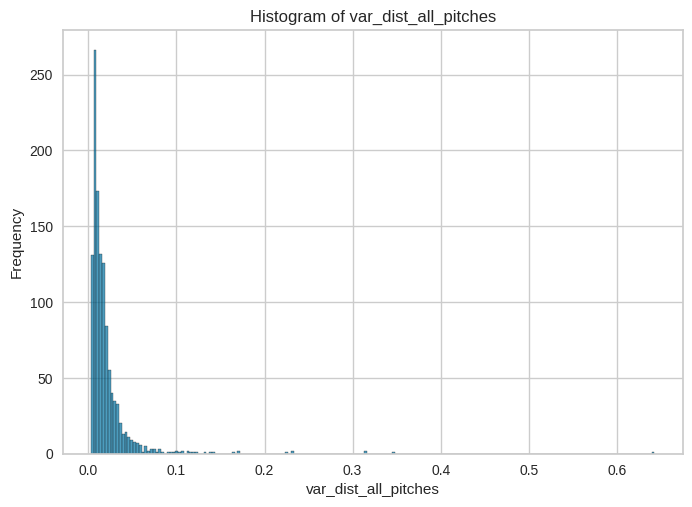

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'var_dist_all_pitches_df'
var_dist_all_pitches = var_dist_all_pitches_df['var_dist_all_pitches']

plt.hist(var_dist_all_pitches, bins=200, edgecolor='k', alpha=0.7)
plt.xlabel('var_dist_all_pitches')
plt.ylabel('Frequency')
plt.title('Histogram of var_dist_all_pitches')
plt.show()

In [ ]:
percentiles = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
percentile_values = var_dist_all_pitches_df['var_dist_all_pitches'].quantile([p / 100 for p in percentiles])
percentile_values

0.1    0.005838
0.2    0.007388
0.3    0.008711
0.4    0.010611
0.5    0.013236
0.6    0.016071
0.7    0.019176
0.8    0.025054
0.9    0.036605
1.0    0.642837
Name: var_dist_all_pitches, dtype: float64

In [ ]:
min_var_dist = var_dist_all_pitches_df['var_dist_all_pitches'].min()
var_dist_all_pitches_df[var_dist_all_pitches_df['var_dist_all_pitches'] == min_var_dist]
all_data[all_data['pitcher'] == 453265]['player_name']
#where does Yusmeiro Petit rank throughout?

35076     Watson, Tony
35077     Watson, Tony
35078     Watson, Tony
35079     Watson, Tony
35080     Watson, Tony
              ...     
272678    Watson, Tony
272679    Watson, Tony
272680    Watson, Tony
272681    Watson, Tony
272682    Watson, Tony
Name: player_name, Length: 1205, dtype: object

In [ ]:
# MOVEMENT
## How are much pitcher's movement varies from expected movement based on similar pitchers (k means clustering)

In [ ]:
# Apply a condition to 'pfx_x' and 'release_pos_x' based on 'p_throws'
all_data['pfx_x_adj'] = all_data.apply(lambda row: row['pfx_x'] * (-1) if row['p_throws'] == 'L' else row['pfx_x'], axis=1)
all_data['release_pos_x_adj'] = all_data.apply(lambda row: row['release_pos_x'] * (-1) if row['p_throws'] == 'L' else row['release_pos_x'], axis=1)

average_pitcher_data = all_data.groupby(['pitcher','pitch_type']).agg({
    'pfx_x_adj': 'mean',
    'pfx_z': 'mean',
    'release_pos_x_adj': 'mean',
    'release_pos_z': 'mean'
}).reset_index()

In [ ]:
average_pitcher_data

,pitcher,pitch_type,pfx_x_adj,pfx_z,release_pos_x_adj,release_pos_z
0,424144,FF,-0.991356,1.286949,-2.133051,5.736949
1,424144,SI,-1.488932,0.630922,-2.576845,5.350971
2,424144,SL,0.804152,-0.115731,-2.541404,5.293158
3,425794,CH,-1.165709,0.663462,-1.329098,6.201971
4,425794,CS,1.294400,-1.236200,-1.316400,6.383200
...,...,...,...,...,...,...
5670,701643,CH,-1.459259,0.126296,-1.825926,4.758148
5671,701643,FC,-0.337059,0.585294,-1.600784,5.096765
5672,701643,FF,-0.536000,0.941000,-1.733000,5.120000
5673,701643,SI,-1.512288,0.566176,-1.564118,5.136209


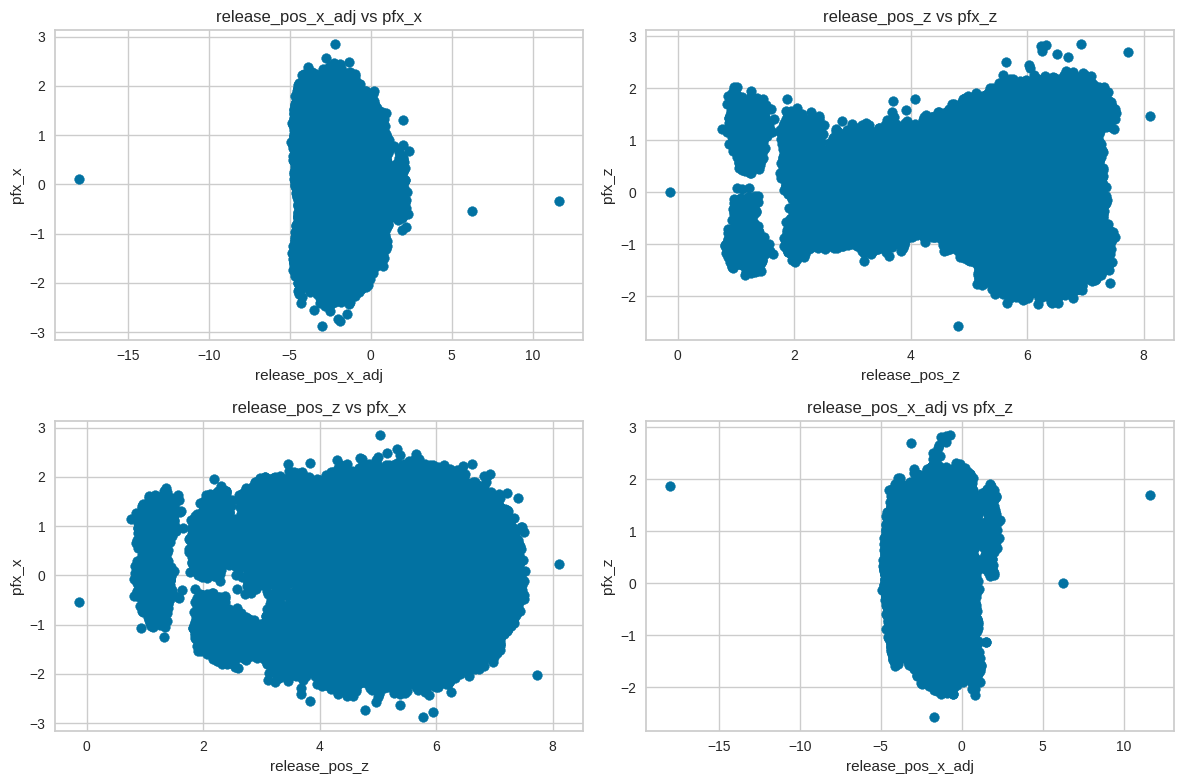

In [ ]:
#make sure to group by pitch type too
#now i need to explore, then cluster.


# Create separate subplots for each comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 'pfx_x' vs 'release_pos_x'
axes[0, 0].scatter(all_data['release_pos_x_adj'], all_data['pfx_x'])
axes[0, 0].set_xlabel('release_pos_x_adj')
axes[0, 0].set_ylabel('pfx_x')
axes[0, 0].set_title('release_pos_x_adj vs pfx_x')

# Plot 'pfx_z' vs 'release_pos_z'
axes[0, 1].scatter(all_data['release_pos_z'], all_data['pfx_z'])
axes[0, 1].set_xlabel('release_pos_z')
axes[0, 1].set_ylabel('pfx_z')
axes[0, 1].set_title('release_pos_z vs pfx_z')

# Plot 'pfx_x' vs 'release_pos_z'
axes[1, 0].scatter(all_data['release_pos_z'], all_data['pfx_x'])
axes[1, 0].set_xlabel('release_pos_z')
axes[1, 0].set_ylabel('pfx_x')
axes[1, 0].set_title('release_pos_z vs pfx_x')

# Plot 'pfx_z' vs 'release_pos_x'
axes[1, 1].scatter(all_data['release_pos_x_adj'], all_data['pfx_z'])
axes[1, 1].set_xlabel('release_pos_x_adj')
axes[1, 1].set_ylabel('pfx_z')
axes[1, 1].set_title('release_pos_x_adj vs pfx_z')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
#It's not gonna work for looking at all pitches as a whole

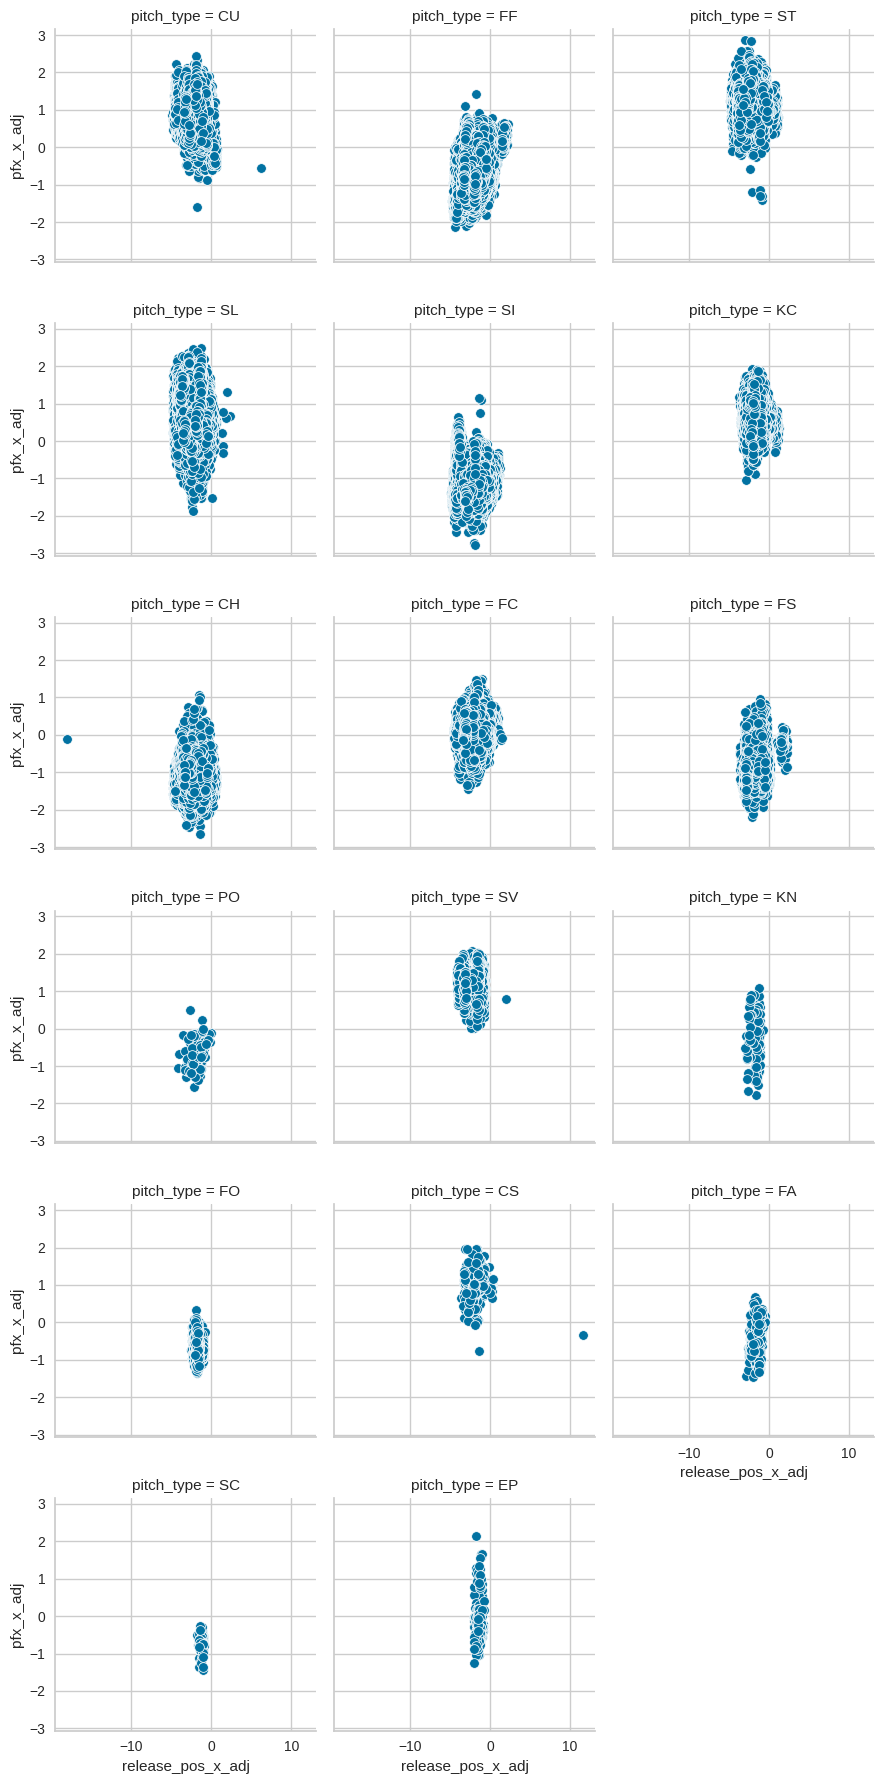

In [ ]:
#break down by pitch

# Create subplots for 'release_pos_x_adj' vs. 'pfx_x' faceted by pitch type
g = sns.FacetGrid(all_data, col='pitch_type',col_wrap=3)
g.map(sns.scatterplot, "release_pos_x_adj", "pfx_x_adj")



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


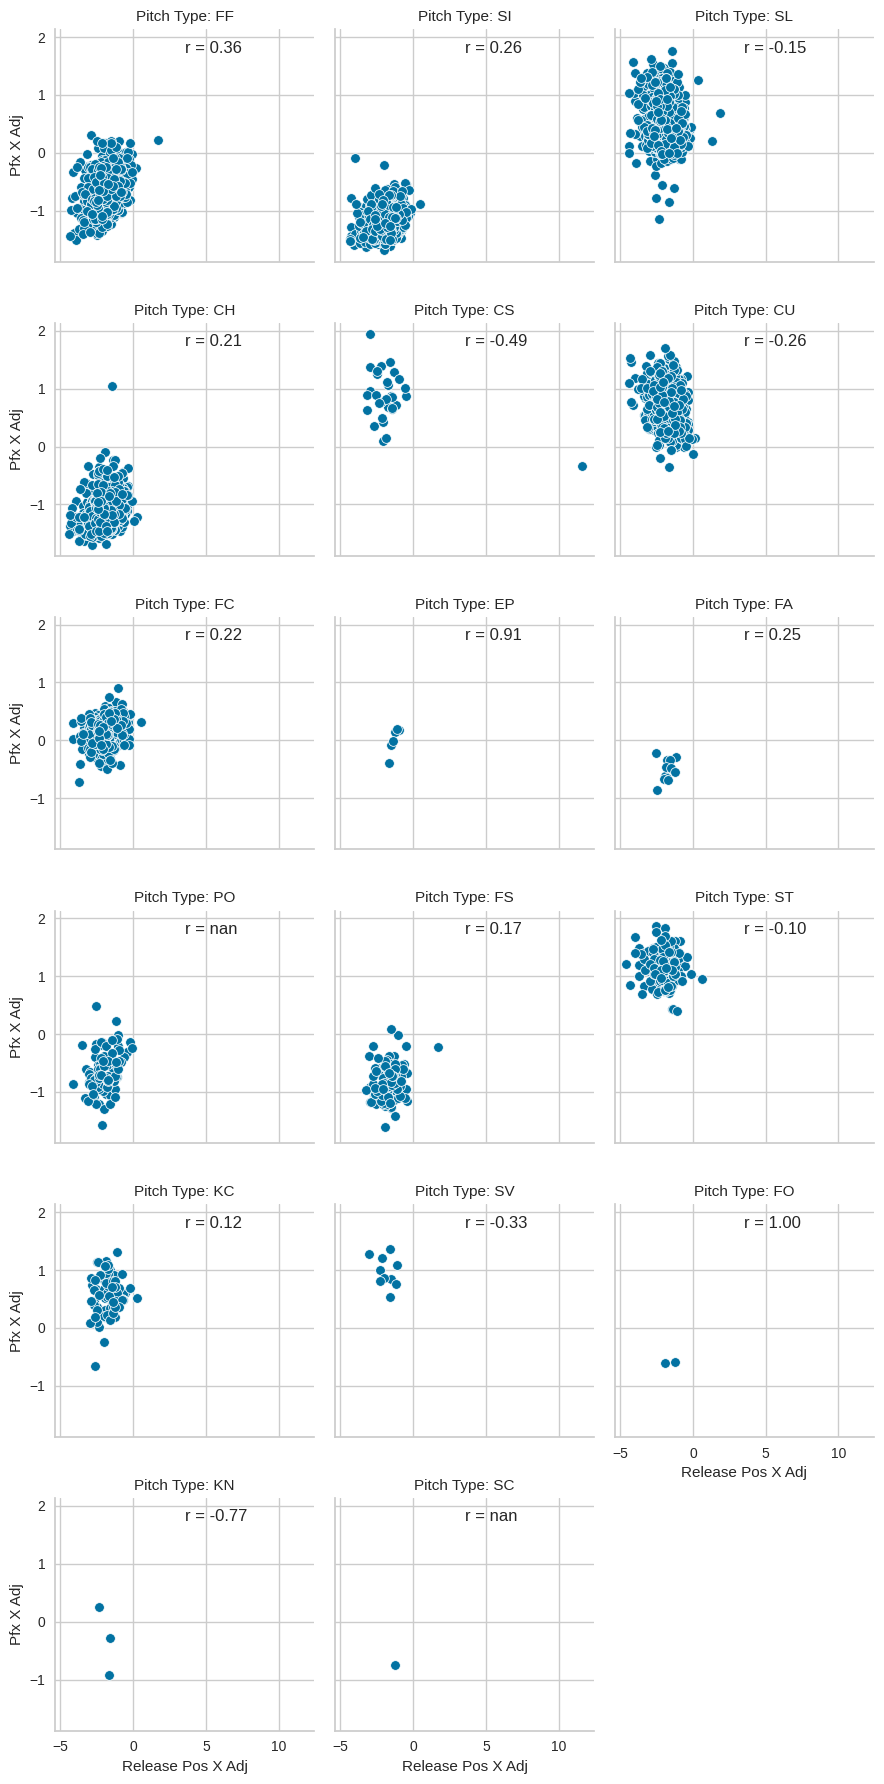

In [ ]:
#EXPLORE AVERAGE PITCHER MOVEMENT BY PITCH TYPE
# X

# Create a FacetGrid with multiple rows and columns
g = sns.FacetGrid(average_pitcher_data, col='pitch_type', col_wrap=3)

# Define a function to calculate the correlation coefficient and display it above each graph
def calculate_and_annotate_correlation(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(0.5, 0.9), xycoords="axes fraction")

g.map(sns.scatterplot, "release_pos_x_adj", "pfx_x_adj")
g.map(calculate_and_annotate_correlation, "release_pos_x_adj", "pfx_x_adj")

# Set axis labels
g.set_axis_labels("Release Pos X Adj", "Pfx X Adj")

# Set titles
g.set_titles("Pitch Type: {col_name}")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


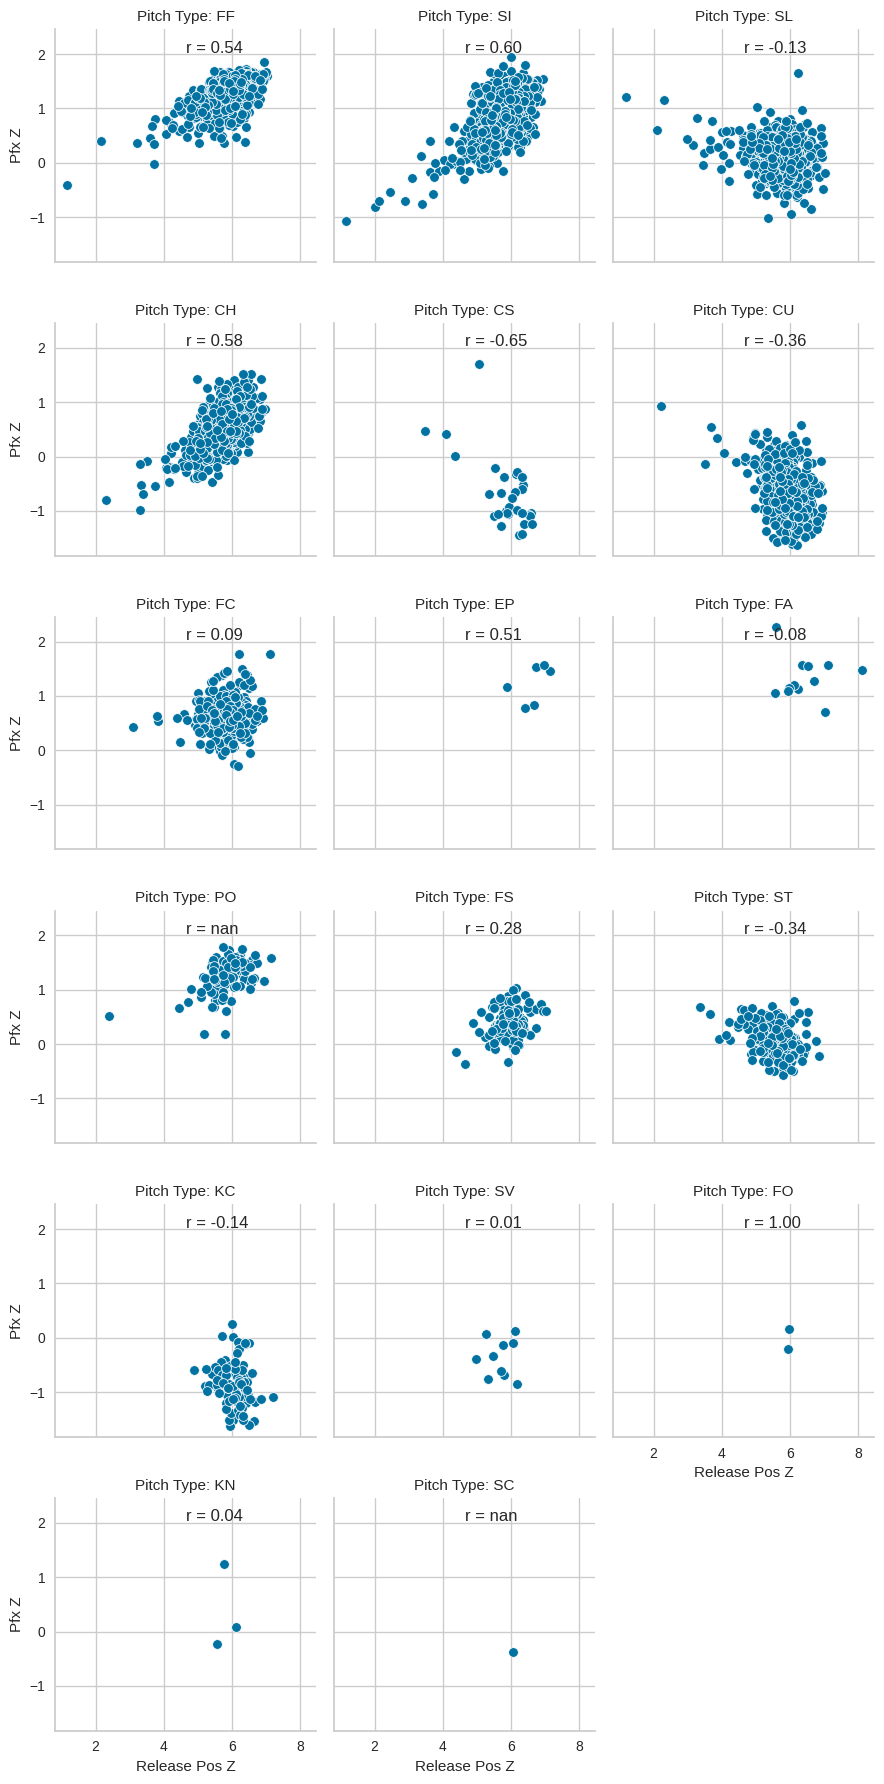

In [ ]:
#EXPLORE AVERAGE PITCHER MOVEMENT BY PITCH TYPE
# Z

# Create a FacetGrid with multiple rows and columns
g = sns.FacetGrid(average_pitcher_data, col='pitch_type', col_wrap=3)

# Define a function to calculate the correlation coefficient and display it above each graph
def calculate_and_annotate_correlation(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(0.5, 0.9), xycoords="axes fraction")

g.map(sns.scatterplot, "release_pos_z", "pfx_z")
g.map(calculate_and_annotate_correlation, "release_pos_z", "pfx_z")

# Set axis labels
g.set_axis_labels("Release Pos Z", "Pfx Z")

# Set titles
g.set_titles("Pitch Type: {col_name}")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#findings: more correlaiton for z than x, but enough to go off of.
#They are all different enough that they should have their own model/clusters


In [ ]:
average_pitcher_data['pitch_type'].value_counts()
all_data['pitch_type'].value_counts()

FF    848379
SL    443634
SI    387825
CH    280711
CU    191764
FC    181042
ST     66295
KC     52834
FS     45028
SV      8586
FA       813
FO       779
CS       453
EP       210
KN       197
PO       140
SC        75
Name: pitch_type, dtype: int64

In [ ]:
# #format data
# features = ['release_pos_x_adj', 'release_pos_z',]
# X = average_pitcher_data[average_pitcher_data['pitch_type'] == 'FF'][features]

# # Select the target variables for y

# y_x = average_pitcher_data[average_pitcher_data['pitch_type'] == 'ST']['pfx_x_adj']
# y_z = average_pitcher_data[average_pitcher_data['pitch_type'] == 'ST']['pfx_x_adj']

In [ ]:
pitch_types_to_remove = ['PO','FO']
average_pitcher_data = average_pitcher_data[~average_pitcher_data['pitch_type'].isin(pitch_types_to_remove)]

#make SV (Slurveball) SL Slurveball, due to low numbers
average_pitcher_data['pitch_type'] = average_pitcher_data['pitch_type'].replace({'SV': 'SL'})
#mkae FA four seamer, due to low numbers
average_pitcher_data['pitch_type'] = average_pitcher_data['pitch_type'].replace({'FA': 'FF'})
#make knucklebal knuckle curve
average_pitcher_data['pitch_type'] = average_pitcher_data['pitch_type'].replace({'KN': 'KC'})

#make forkball a splittler
average_pitcher_data['pitch_type'] = average_pitcher_data['pitch_type'].replace({'FO': 'SL'})

#make screwball a KC. i don't really know on this one though.
average_pitcher_data['pitch_type'] = average_pitcher_data['pitch_type'].replace({'SC': 'KC'})




#make eephus changeup
#this feels risky, but going to put eephus pitch with changeups.
#I tried getting rid of it earlier, but I think i like having it in there because it's a deceptive pitch.
average_pitcher_data['pitch_type'] = average_pitcher_data['pitch_type'].replace({'EP': 'CH'})

print('these decisions took a ton of time and debugging, especially when i added in new years')
average_pitcher_data['pitch_type'].unique()


these decisions took a ton of time and debugging, especially when i added in new years


<ipython-input-33-17f9e557ef3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_pitcher_data['pitch_type'] = average_pitcher_data['pitch_type'].replace({'SV': 'SL'})
<ipython-input-33-17f9e557ef3f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_pitcher_data['pitch_type'] = average_pitcher_data['pitch_type'].replace({'FA': 'FF'})
<ipython-input-33-17f9e557ef3f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

array(['FF', 'SI', 'SL', 'CH', 'CS', 'CU', 'FC', 'FS', 'ST', 'KC'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Initialize rmseS
pitch_type_rmse = {}

for pitch in average_pitcher_data['pitch_type'].unique():


# Split the data into training and testing sets
# Assuming average_pitcher_data is your dataset
  X = average_pitcher_data[average_pitcher_data['pitch_type'] == pitch][['release_pos_x_adj', 'release_pos_z']]
  y = average_pitcher_data[average_pitcher_data['pitch_type'] == pitch]['pfx_x_adj']  # Use 'pfx_x' as the target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  #drop nas
  # X_train = X_train.dropna()
  # X_test = X_test.dropna()
  # y_train = y_train.dropna()
  # y_test = y_test.dropna()

  # Define a function to calculate RMSE
  def rmse(actual, predicted):
      return np.sqrt(mean_squared_error(actual, predicted))

  # Define a function to perform KNN regression and calculate RMSE
  def knn_pred_x(k, training, testing):
      knn_model = KNeighborsRegressor(n_neighbors=k)
      knn_model.fit(X_train, y_train)  # Use X_train and y_train as the feature matrix and target variable
      pred_x = knn_model.predict(X_test)  # Use X_test for making predictions
      return rmse(y_test, pred_x)  # Use y_test for actual values

  # Possible values of k
  test_data_length = .7*len(X_train)

  if 100 < test_data_length <= 500:
      k_values = [1, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100]
  elif 66 < test_data_length <= 100:
      k_values = [1, 5, 10, 15, 20, 25, 30, 40, 50]
  elif 40 < test_data_length  <= 70:
      k_values = [1, 5, 10, 15, 20, 25]
  elif 8 < test_data_length < 40:
      k_values = [1,5]
  elif test_data_length < 8:
      k_values = [1]

  else:
      k_values = [1, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100]

## ^^ did the inequalities arbitrarily, but doesn't matter much.


  # Calculate RMSE for training and testing datasets
  knn_train_rmse = [knn_pred_x(k, X_train, X_train) for k in k_values]
  knn_test_rmse = [knn_pred_x(k, X_train, X_test) for k in k_values]

  optimal_k = k_values[np.argmin(knn_test_rmse)]

  pitch_type_rmse[pitch] = {
        "optimal_k": optimal_k,
        "knn_train_rmse": knn_train_rmse,
        "knn_test_rmse": knn_test_rmse
    }


  # Find the optimal value of k (the one with the lowest test RMSE)
  optimal_k = k_values[np.argmin(knn_test_rmse)]

  print(f"optimal k for {pitch}: {optimal_k:.2f}")


  print(f"rmse values for {pitch}: {knn_train_rmse}")

print("\n when i had eephus pitch as it's own thing, it messed up the other ones, gave them lower optimal K values")


optimal k for FF: 100.00
rmse values for FF: [0.3587917608771341, 0.26824084766610207, 0.2609162911055763, 0.26265922324553276, 0.25755832669526113, 0.25575660803728606, 0.25516480053306295, 0.2548517240276697, 0.2544839857417698, 0.25381057224810416, 0.25340349050273603]
optimal k for SI: 20.00
rmse values for SI: [0.27082704378127087, 0.19910797473199499, 0.1896058018121797, 0.1865586810431608, 0.18523859775360693, 0.18626830403132483, 0.1874304376067268, 0.18811994496912307, 0.18767496964348532, 0.1884817968521439, 0.1896395487312005]
optimal k for SL: 100.00
rmse values for SL: [0.4770574322831318, 0.3875181572329791, 0.3741778917669309, 0.3683416599391825, 0.3628551226784473, 0.36195560731494325, 0.3612766515670397, 0.3634517696589882, 0.360786613316737, 0.3600609993858055, 0.35947087264624933]
optimal k for CH: 40.00
rmse values for CH: [0.3254839063708904, 0.2615906410382692, 0.25207343078244393, 0.24942272101583804, 0.2461231565867309, 0.2459869830814407, 0.2465164265024834, 0.

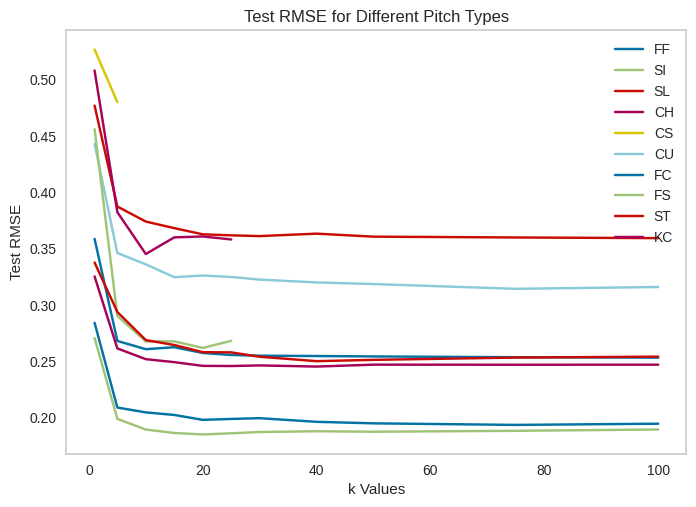

they mostly taper out around 15/20


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store RMSE values and k values
test_rmses = []
k_values = [1, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100]

# Extract test RMSE values for each pitch type
for pitch, results in pitch_type_rmse.items():
    test_rmse = results["knn_test_rmse"]
    test_rmses.append(test_rmse)

# Create a plot
for rmse, pitch in zip(test_rmses, pitch_type_rmse.keys()):
    if len(rmse) < len(k_values):
        # Pad shorter RMSE values with NaNs to match the length of k_values
        rmse = np.pad(rmse, (0, len(k_values) - len(rmse)), 'constant', constant_values=np.nan)

    plt.plot(k_values, rmse, label=pitch)

plt.xlabel("k Values")
plt.ylabel("Test RMSE")
plt.title("Test RMSE for Different Pitch Types")
plt.legend()
plt.grid()
plt.show()

print("they mostly taper out around 15/20")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the k value
k = 15

# Create and fit a KNN model for each pitch type
for pitch in average_pitcher_data['pitch_type'].unique():
    # Filter the data for the specific pitch type
    data_for_pitch = average_pitcher_data[average_pitcher_data['pitch_type'] == pitch]

    # Extract the features and target variable
    X = data_for_pitch[['release_pos_x_adj', 'release_pos_z']]
    y = data_for_pitch['pfx_x_adj']

    # X = X.dropna()
    # y = y.dropna()


    # Create and fit the KNN model with k = 15
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X, y)

    # Make predictions for the specific pitch type
    preds_x = knn_model.predict(X)

    # Add the predictions to the original DataFrame for this pitch type

    average_pitcher_data.loc[average_pitcher_data['pitch_type'] == pitch, 'new_preds_x'] = preds_x
    print(pitch)


FF
SI
SL
CH
CS
CU
FC
FS
ST
KC


<ipython-input-36-fb2f227feebc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_pitcher_data.loc[average_pitcher_data['pitch_type'] == pitch, 'new_preds_x'] = preds_x


In [ ]:
#same, but for z now
#test
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Initialize rmseS
pitch_type_rmse = {}

for pitch in average_pitcher_data['pitch_type'].unique():


# Split the data into training and testing sets
# Assuming average_pitcher_data is your dataset
  X = average_pitcher_data[average_pitcher_data['pitch_type'] == pitch][['release_pos_x_adj', 'release_pos_z']]
  y = average_pitcher_data[average_pitcher_data['pitch_type'] == pitch]['pfx_z']  # Use 'pfx_z' as the target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Define a function to calculate RMSE
  def rmse(actual, predicted):
      return np.sqrt(mean_squared_error(actual, predicted))

  # Define a function to perform KNN regression and calculate RMSE
  def knn_pred_x(k, training, testing):
      knn_model = KNeighborsRegressor(n_neighbors=k)
      knn_model.fit(X_train, y_train)  # Use X_train and y_train as the feature matrix and target variable
      pred_z = knn_model.predict(X_test)  # Use X_test for making predictions
      return rmse(y_test, pred_z)  # Use y_test for actual values

  # Possible values of k
  test_data_length = .7*len(X_train)

  if 100 < test_data_length <= 500:
      k_values = [1, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100]
  elif 66 < test_data_length <= 100:
      k_values = [1, 5, 10, 15, 20, 25, 30, 40, 50]
  elif 40 < test_data_length  <= 70:
      k_values = [1, 5, 10, 15, 20, 25]
  elif 8 < test_data_length < 40:
      k_values = [1,5]
  elif test_data_length < 8:
      k_values = [1]

  else:
      k_values = [1, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100]




  # Calculate RMSE for training and testing datasets
  knn_train_rmse = [knn_pred_x(k, X_train, X_train) for k in k_values]
  knn_test_rmse = [knn_pred_x(k, X_train, X_test) for k in k_values]

  optimal_k = k_values[np.argmin(knn_test_rmse)]

  pitch_type_rmse[pitch] = {
        "optimal_k": optimal_k,
        "knn_train_rmse": knn_train_rmse,
        "knn_test_rmse": knn_test_rmse
    }


  # Find the optimal value of k (the one with the lowest test RMSE)
  optimal_k = k_values[np.argmin(knn_test_rmse)]

  print(f"optimal k for {pitch}: {optimal_k:.2f}")


  print(f"rmse values for {pitch}: {knn_train_rmse}")






optimal k for FF: 50.00
rmse values for FF: [0.26526481865842394, 0.21058377183992635, 0.19964012446627247, 0.19884224382734716, 0.19657461088333683, 0.19526857655226093, 0.19545386705672943, 0.19606557594351665, 0.1950930624977167, 0.1981741956512468, 0.20010359367852146]
optimal k for SI: 20.00
rmse values for SI: [0.45992080430056403, 0.33682955633054207, 0.31693252962839896, 0.3144116205105883, 0.31336358206957843, 0.3158048600497761, 0.317855566924838, 0.3248409316650884, 0.32890655371378436, 0.3323608159220459, 0.3375179466435063]
optimal k for SL: 100.00
rmse values for SL: [0.43564390309989803, 0.32725544901660236, 0.309818630367181, 0.30642528353779225, 0.3042638039190968, 0.30097078799435295, 0.30064563421808216, 0.3004071654487224, 0.2981602546257348, 0.29795809460456685, 0.2972673849274104]
optimal k for CH: 25.00
rmse values for CH: [0.3756727761685215, 0.2947913865616041, 0.28880778696228376, 0.284508495825634, 0.2848451515973457, 0.28347849836971833, 0.28474122386612927,

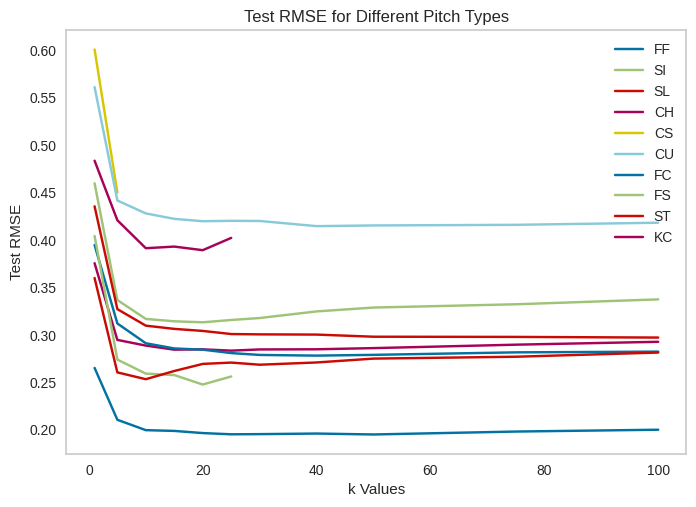

they mostly taper out around 15/20


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store RMSE values and k values
test_rmses = []
k_values = [1, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100]

# Extract test RMSE values for each pitch type
for pitch, results in pitch_type_rmse.items():
    test_rmse = results["knn_test_rmse"]
    test_rmses.append(test_rmse)

# Create a plot
for rmse, pitch in zip(test_rmses, pitch_type_rmse.keys()):
    if len(rmse) < len(k_values):
        # Pad shorter RMSE values with NaNs to match the length of k_values
        rmse = np.pad(rmse, (0, len(k_values) - len(rmse)), 'constant', constant_values=np.nan)

    plt.plot(k_values, rmse, label=pitch)

plt.xlabel("k Values")
plt.ylabel("Test RMSE")
plt.title("Test RMSE for Different Pitch Types")
plt.legend()
plt.grid()
plt.show()

print("they mostly taper out around 15/20")

In [ ]:
#now run model_z
from sklearn.neighbors import KNeighborsRegressor

# Define the k value
k = 15

# Create and fit a KNN model for each pitch type
for pitch in average_pitcher_data['pitch_type'].unique():
    # Filter the data for the specific pitch type
    data_for_pitch = average_pitcher_data[average_pitcher_data['pitch_type'] == pitch]

    # Extract the features and target variable
    X = data_for_pitch[['release_pos_x_adj', 'release_pos_z']]
    y = data_for_pitch['pfx_z']

    # Create and fit the KNN model with k = 15
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X, y)

    # Make predictions for the specific pitch type
    preds_z = knn_model.predict(X)

    # Add the predictions to the original DataFrame for this pitch type
    average_pitcher_data.loc[average_pitcher_data['pitch_type'] == pitch, 'new_preds_z'] = preds_z


<ipython-input-39-a933c31292d6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_pitcher_data.loc[average_pitcher_data['pitch_type'] == pitch, 'new_preds_z'] = preds_z


In [ ]:
#take the abs value of difference for predictions and actual locations for both models
average_pitcher_data['abs_pred-actual_x'] = abs(average_pitcher_data['pfx_x_adj'] - average_pitcher_data['new_preds_x'])
average_pitcher_data['abs_pred-actual_z'] = abs(average_pitcher_data['pfx_z'] - average_pitcher_data['new_preds_z'])


#the higher the difference, the more deceptive a pitcher is because they have more movement than expceted


##OKAY FEELIN GOOD. DO WHAT YOU DID, BUT CREATE A NEW DF FOR EACH PITCH TYPE, AND THEN APPEND THOSE results. do a model for x and z, for each of the main pitch types.
#then you can get deviance from predictions and stuff and use those as scores to throw into the regression model at the end.
#then do your data viz- it can be r shiny, or you can go sicko mode with plotly or something.

<ipython-input-40-51357a29f446>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_pitcher_data['abs_pred-actual_x'] = abs(average_pitcher_data['pfx_x_adj'] - average_pitcher_data['new_preds_x'])
<ipython-input-40-51357a29f446>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_pitcher_data['abs_pred-actual_z'] = abs(average_pitcher_data['pfx_z'] - average_pitcher_data['new_preds_z'])


In [ ]:
average_pitcher_data.max()
average_pitcher_data['abs_pred-actual_x'].max()

all_data[all_data['pitcher']==693821]['player_name']
print("Bryce Elder's sweeper moves horizontally more than expected than any pitcher's pitch")

Bryce Elder's sweeper moves horizontally more than expected than any pitcher's pitch


In [ ]:
average_pitcher_data.max()
# average_pitcher_data['abs_pred-actual_z].max()
average_pitcher_data[average_pitcher_data['abs_pred-actual_x']==average_pitcher_data['abs_pred-actual_x'].max()]

all_data[all_data['pitcher']==605538]['player_name']
# print(f"jose berrios' slider has most unexpected vertical movement. for 20-22 data")
# print("aaron Civale came out on top for 19-23 data")
# print("Civale's ability to pound the zone and stay ahead in the count has been enormously effective. It's this deceptive simplicity that has been the key to Civale's success thus far")

736206    Wisler, Matt
736207    Wisler, Matt
736208    Wisler, Matt
736209    Wisler, Matt
736210    Wisler, Matt
              ...     
272065    Wisler, Matt
272066    Wisler, Matt
272067    Wisler, Matt
272068    Wisler, Matt
272069    Wisler, Matt
Name: player_name, Length: 2075, dtype: object

In [ ]:
#now have to weigh each differenc in pred by amount pitcher throws that pitch, then i can combine them and get a single metric.

# i did this earlier but going to do again to get rid of certain pitches
#remove lesser thrown pitches
pitch_types_to_remove = ['EP']
all_data_adj = all_data[~all_data['pitch_type'].isin(pitch_types_to_remove)]


# Calculate the proportion of each 'pitch_type' for each pitcher for all pitches thrown by that pitcher
pitcher_pitch_type_proportions = all_data_adj.groupby(['pitcher', 'pitch_type']).size() / all_data_adj.groupby('pitcher').size()

# Pivot the proportions to match the same groupings and dimensions as pitcher_pitch_type_variances
pitcher_pitch_type_proportions = pitcher_pitch_type_proportions.unstack(fill_value=0)

pitcher_pitch_type_proportions['pitcher'] = pitcher_pitch_type_proportions.index


# Reshape the DataFrame from wide to long format
pitch_freq_df = pd.melt(pitcher_pitch_type_proportions, id_vars=['pitcher'], var_name='pitch_type', value_name='how_often_thrown')

# Reset the index if needed
pitch_freq_df.reset_index(drop=True, inplace=True)



#get rid of pitches pitchers haven't thrown
pitch_freq_df = pitch_freq_df[pitch_freq_df['how_often_thrown'] != 0]

pitch_freq_df = pitch_freq_df.sort_values(by=['pitcher', 'pitch_type'])

# Reset the index if needed
pitch_freq_df.reset_index(drop=True, inplace=True)




# Print the resulting DataFrame
pitch_freq_df

#make sure the average_pitcher_data df is sorted the same
# average_pitcher_data = average_pitcher_data.sort_values(by=['pitcher', 'pitch_type'])
average_pitcher_data

#can't figure out why pitch_freq_df has 30 more entries than average_pitcher_data, but ill just inner join.

,pitcher,pitch_type,pfx_x_adj,pfx_z,release_pos_x_adj,release_pos_z,new_preds_x,new_preds_z,abs_pred-actual_x,abs_pred-actual_z
0,424144,FF,-0.991356,1.286949,-2.133051,5.736949,-0.761154,1.254848,0.230202,0.032101
1,424144,SI,-1.488932,0.630922,-2.576845,5.350971,-1.256199,0.652671,0.232733,0.021749
2,424144,SL,0.804152,-0.115731,-2.541404,5.293158,0.676992,0.063035,0.127160,0.178766
3,425794,CH,-1.165709,0.663462,-1.329098,6.201971,-1.032336,0.746048,0.133373,0.082586
4,425794,CS,1.294400,-1.236200,-1.316400,6.383200,0.792094,-0.894909,0.502306,0.341291
...,...,...,...,...,...,...,...,...,...,...
5670,701643,CH,-1.459259,0.126296,-1.825926,4.758148,-1.222057,0.266367,0.237202,0.140071
5671,701643,FC,-0.337059,0.585294,-1.600784,5.096765,0.088805,0.560813,0.425864,0.024481
5672,701643,FF,-0.536000,0.941000,-1.733000,5.120000,-0.715544,1.150505,0.179544,0.209505
5673,701643,SI,-1.512288,0.566176,-1.564118,5.136209,-1.323349,0.643015,0.188939,0.076838


In [ ]:
#now merge the dfs
weighted_pitch_freq_df = pd.merge(average_pitcher_data, pitch_freq_df, on=['pitcher', 'pitch_type'], how='inner')
#apply weights
weighted_pitch_freq_df['movement_score_x'] = weighted_pitch_freq_df['abs_pred-actual_x'] * weighted_pitch_freq_df['how_often_thrown']
weighted_pitch_freq_df['movement_score_z'] = weighted_pitch_freq_df['abs_pred-actual_z'] * weighted_pitch_freq_df['how_often_thrown']


pitcher_movement_score = weighted_pitch_freq_df.groupby('pitcher').agg({'movement_score_x': 'sum', 'movement_score_z': 'sum'})
pitcher_movement_score_df = pitcher_movement_score.reset_index()

pitcher_movement_score_df #########

pitcher_movement_score_df.max()
pitcher_movement_score_df[pitcher_movement_score_df['movement_score_x']==pitcher_movement_score_df['movement_score_x'].max()]

all_data[all_data['pitcher']==607755]['player_name']

pitcher_movement_score_df.max()
pitcher_movement_score_df[pitcher_movement_score_df['movement_score_z']==pitcher_movement_score_df['movement_score_z'].max()]

all_data[all_data['pitcher']==491624]['player_name']

print('Andrew Vasquez overall has most unexpected horizontal pitch movement')
print('A.V. Quote:  “His curve and fastball come out in the same arm slot, making it very deceiving for a hitter to pick up on what pitch is coming. They’re deathly afraid of getting caught with a surprise fastball they can’t catch up with after having to sit back for the breaking ball.”')
print(f"César Valdez overall has most unexpected horizontal pitch movement")
print(f"C.V. Quote: Quote: “The first time we faced him, the hitters were like, 'This is not your typical changeup,’” Red Sox hitting coach Tim Hyers told FanGraphs. “It’s almost like a unique curveball, because it gets to home plate and just dives. And at times, it can dive both ways; it can break in or break out.")
# pitcher_movement_score_df

Andrew Vasquez overall has most unexpected horizontal pitch movement
A.V. Quote:  “His curve and fastball come out in the same arm slot, making it very deceiving for a hitter to pick up on what pitch is coming. They’re deathly afraid of getting caught with a surprise fastball they can’t catch up with after having to sit back for the breaking ball.”
César Valdez overall has most unexpected horizontal pitch movement
C.V. Quote: Quote: “The first time we faced him, the hitters were like, 'This is not your typical changeup,’” Red Sox hitting coach Tim Hyers told FanGraphs. “It’s almost like a unique curveball, because it gets to home plate and just dives. And at times, it can dive both ways; it can break in or break out.


In [ ]:
#thinking about who gets most swings out of the zone. could also do predictiblity of pitch type given count.

In [ ]:
#get CSW
pitcher_csw = all_data.groupby(['pitcher']).agg(
    csw=pd.NamedAgg(column='description', aggfunc=lambda x: (x.isin(['swinging_strike', 'called_strike', 'swinging_strike_blocked'])).sum() / len(x)),
    ).reset_index()

pitcher_csw

,pitcher,csw
0,424144,0.293578
1,425794,0.281935
2,425844,0.262903
3,429722,0.266228
4,431148,0.231884
...,...,...
1203,695243,0.252874
1204,696136,0.252144
1205,696147,0.278481
1206,700363,0.226824


In [ ]:
#silly cleaning/reformatting:
var_dist_all_pitches_df.columns = ['pitcher_id', 'var_dist_all_pitches']
var_dist_all_pitches_df

,pitcher_id,var_dist_all_pitches
pitcher,,
424144,424144,0.073318
425794,425794,0.015931
425844,425844,0.019999
429722,429722,0.009885
431148,431148,0.008676
...,...,...
695243,695243,0.006930
696136,696136,0.022084
696147,696147,0.007260


In [ ]:
var_and_movement = pd.merge(pitcher_movement_score_df, var_dist_all_pitches_df, left_on='pitcher', right_on='pitcher_id', how='inner')
ready_for_regression = pd.merge(var_and_movement, pitcher_csw, on='pitcher')
ready_for_regression

,pitcher,movement_score_x,movement_score_z,pitcher_id,var_dist_all_pitches,csw
0,424144,0.190984,0.084732,424144,0.073318,0.293578
1,425794,0.366425,0.172664,425794,0.015931,0.281935
2,425844,0.551799,0.308360,425844,0.019999,0.262903
3,429722,0.096207,0.127918,429722,0.009885,0.266228
4,431148,0.299035,0.115225,431148,0.008676,0.231884
...,...,...,...,...,...,...
1197,695243,0.093503,0.149027,695243,0.006930,0.252874
1198,696136,0.168932,0.145089,696136,0.022084,0.252144
1199,696147,0.324045,0.057337,696147,0.007260,0.278481
1200,700363,0.083693,0.143340,700363,0.012290,0.226824


In [ ]:

# Assuming 'ready_for_regression' is your DataFrame
X = ready_for_regression[["movement_score_x", "movement_score_z","var_dist_all_pitches"]]  # Independent variables
y = ready_for_regression["csw"]  # Dependent variable

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_

# Print the coefficients and intercept
print("Coefficients:", coefficients)

ready_for_regression['deception_rankings'] = (
    coefficients[0] * ready_for_regression['movement_score_x'] +
    coefficients[1] * ready_for_regression['movement_score_z'] +
    coefficients[2] * ready_for_regression['var_dist_all_pitches']
)

ready_for_regression

final_rankings = pd.merge(ready_for_regression, all_data[['pitcher', 'player_name']], on='pitcher', how='inner')
final_rankings = final_rankings.groupby('pitcher').first().reset_index()
final_rankings = final_rankings.sort_values(by='deception_rankings', ascending=False)


#get rankings for the categories
# Create new columns with rankings
final_rankings['movement_score_x_rank'] = final_rankings['movement_score_x'].rank(ascending=False).astype(int)
final_rankings['movement_score_z_rank'] = final_rankings['movement_score_z'].rank(ascending=False).astype(int)
final_rankings['var_dist_all_pitches_rank'] = final_rankings['var_dist_all_pitches'].rank(ascending=False).astype(int)
final_rankings['csw_rank'] = final_rankings['csw'].rank(ascending=False).astype(int)
final_rankings['deception_rankings_rank'] = final_rankings['deception_rankings'].rank(ascending=False).astype(int)


final_rankings

Coefficients: [0.02748576 0.0103421  0.00927424]


,pitcher,movement_score_x,movement_score_z,pitcher_id,var_dist_all_pitches,csw,deception_rankings,player_name,movement_score_x_rank,movement_score_z_rank,var_dist_all_pitches_rank,csw_rank,deception_rankings_rank
423,607755,0.792470,0.436526,607755,0.347765,0.321300,0.029521,"Vasquez, Andrew",1,35,2,57,1
637,643511,0.704450,0.743300,643511,0.004196,0.284845,0.027089,"Rogers, Tyler",3,2,1174,360,2
310,594985,0.488506,0.541629,594985,0.642837,0.293532,0.024990,"Rowen, Ben",25,11,1,247,3
233,572383,0.703667,0.152881,572383,0.313498,0.268116,0.023829,"Moran, Brian",4,721,4,669,4
444,608718,0.723493,0.247551,608718,0.015640,0.268943,0.022591,"Suter, Brent",2,285,498,660,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,571446,0.006941,0.125559,571446,0.042333,0.248322,0.001882,"Appel, Mark",1201,885,97,974,1198
322,595928,0.005360,0.142492,595928,0.021217,0.279330,0.001818,"Curtiss, John",1202,790,316,465,1199
8,444468,0.017946,0.062047,444468,0.005930,0.248322,0.001190,"Rondón, Héctor",1197,1153,1074,974,1200
154,543281,0.007430,0.041813,543281,0.028258,0.158416,0.000899,"Harrison, Josh",1200,1187,205,1201,1201


In [ ]:
unique_years = all_data.drop_duplicates(subset=['pitcher', 'game_year'])
leaderboard = final_rankings.merge(unique_years.groupby('pitcher')['game_year'].apply(lambda x: ', '.join(x.astype(str))).reset_index(), on='pitcher', how='left')

# Rename the new column to 'years_played'
leaderboard.rename(columns={'game_year': 'years_played'}, inplace=True)
leaderboard['deception_rankings'] = leaderboard['deception_rankings'].round(3)
leaderboard

,pitcher,movement_score_x,movement_score_z,pitcher_id,var_dist_all_pitches,csw,deception_rankings,player_name,movement_score_x_rank,movement_score_z_rank,var_dist_all_pitches_rank,csw_rank,deception_rankings_rank,years_played
0,607755,0.792470,0.436526,607755,0.347765,0.321300,0.030,"Vasquez, Andrew",1,35,2,57,1,"2023, 2022, 2021"
1,643511,0.704450,0.743300,643511,0.004196,0.284845,0.027,"Rogers, Tyler",3,2,1174,360,2,"2023, 2022, 2021, 2020"
2,594985,0.488506,0.541629,594985,0.642837,0.293532,0.025,"Rowen, Ben",25,11,1,247,3,2021
3,572383,0.703667,0.152881,572383,0.313498,0.268116,0.024,"Moran, Brian",4,721,4,669,4,"2022, 2020"
4,608718,0.723493,0.247551,608718,0.015640,0.268943,0.023,"Suter, Brent",2,285,498,660,5,"2023, 2022, 2021, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,571446,0.006941,0.125559,571446,0.042333,0.248322,0.002,"Appel, Mark",1201,885,97,974,1198,2022
1198,595928,0.005360,0.142492,595928,0.021217,0.279330,0.002,"Curtiss, John",1202,790,316,465,1199,"2023, 2021, 2020"
1199,444468,0.017946,0.062047,444468,0.005930,0.248322,0.001,"Rondón, Héctor",1197,1153,1074,974,1200,"2021, 2020"
1200,543281,0.007430,0.041813,543281,0.028258,0.158416,0.001,"Harrison, Josh",1200,1187,205,1201,1201,"2023, 2022"


In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Assuming 'leaderboard' is your DataFrame
top_30_leaderboard = leaderboard.head(30)

# Create a DataFrame for the fancy table
fancy_table = pd.DataFrame({
    ' Rank ': range(1, 31),
    ' Player Name ': top_30_leaderboard['player_name'],
    ' Years Played ': top_30_leaderboard['years_played'],
    ' Deception Score ': top_30_leaderboard['deception_rankings'],
    ' Hor. Movement Rank ': top_30_leaderboard['movement_score_x_rank'],
    ' Vert. Movement Rank ': top_30_leaderboard['movement_score_x_rank'],
    ' Release Point Variance Rank ': top_30_leaderboard['var_dist_all_pitches_rank'],
    'CSW Rank': top_30_leaderboard['csw_rank']

})

#fix numbers
fancy_table[' Deception Score '] = fancy_table[' Deception Score '].apply(lambda x: f'{x:.3f}')


# Styling: Blue background and black text
styled_table = fancy_table.style.set_properties(**{'background-color': 'lightblue', 'color': 'black'})

# Display the styled table
display(HTML(styled_table.render()))


<ipython-input-53-3c7eeb3feccd>:28: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  display(HTML(styled_table.render()))


,Rank,Player Name,Years Played,Deception Score,Hor. Movement Rank,Vert. Movement Rank,Release Point Variance Rank,CSW Rank
0,1,"Vasquez, Andrew","2023, 2022, 2021",0.030,1,1,2,57
1,2,"Rogers, Tyler","2023, 2022, 2021, 2020",0.027,3,3,1174,360
2,3,"Rowen, Ben",2021,0.025,25,25,1,247
3,4,"Moran, Brian","2022, 2020",0.024,4,4,4,669
4,5,"Suter, Brent","2023, 2022, 2021, 2020",0.023,2,2,498,660
5,6,"Vespi, Nick","2023, 2022",0.022,12,12,223,213
6,7,"Smyly, Drew","2023, 2022, 2021, 2020",0.021,10,10,811,400
7,8,"Valdez, César","2023, 2022, 2021, 2020",0.021,52,52,9,162
8,9,"Crick, Kyle","2023, 2022, 2021, 2020",0.020,5,5,898,314
9,10,"Steele, Justin","2023, 2022, 2021",0.020,6,6,927,707
